<a href="https://colab.research.google.com/github/Glasiermedic/Website-scraping-/blob/master/5_2_4_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from IPython.display import display

import spacy
import re
#from nltk.corpus import gutenberg, stopwords
#from collections import Counter
#import nltk
#nltk.download('gutenberg')

#from spacy.lang.en import English

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split

from timeit import default_timer as timer

from nltk.tokenize import BlanklineTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import urllib.request
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

import pydotplus
from sklearn import tree
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
!pip install scrapy

     |████████████████████████████████| 235kB 4.7MB/s 
     |████████████████████████████████| 61kB 21.9MB/s 
     |████████████████████████████████| 3.1MB 40.1MB/s 
     |████████████████████████████████| 2.3MB 30.6MB/s 
     |████████████████████████████████| 174kB 44.3MB/s 
     |████████████████████████████████| 61kB 12.1MB/s 
     |████████████████████████████████| 102kB 28.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Stored in directory: /root/.cache/pip/wheels/19/4c/a1/0bef832134076abab3461815e92cf41f2518dffe1a5337203b
Successfully built PyDispatcher Twisted


##  Searching Craigslist from your friendly Python environment: for the serious coder

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

In [3]:
search_item = input("What are we looking for today?")

search_price_range = input("What is the minimum and maximum price? format: (number,number)")

What are we looking for today?Olive Oil
What is the minimum and maximum price? format: (number,number)(red,blue)


In [4]:
#@title
import scrapy
from scrapy.crawler import CrawlerProcess


class CLSpider(scrapy.Spider):
    name = "CL"
    
    # Here is where we insert our API call.
    start_urls = [
        'https://sandiego.craigslist.org/search/sss?query={}&sort=date&hasPic=1&\
        searchNearby=2&nearbyArea=455&nearbyArea=104&nearbyArea=7&nearbyArea=103\
        &nearbyArea=209&nearbyArea=370'.format(search_item)
    ]

    # Identifying the information we want from the query response and extracting it using xpath.
    def parse(self, response):
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date' : posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first(),
                'location' : posting.xpath('span/span[@class="result-hood"]/text()').extract_first(),
                'html' : posting.xpath('a/@href').extract_first()
            }
        next_page = response.xpath('//div/div/span[@class="buttons"]/a[3][@href]').extract_first()
        
        pagenum = int(re.findall(r'\d+',next_page)[0])
        
        if next_page is not None and pagenum < 10:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse)

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'cldata.json',  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcamp_Katherine (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(CLSpider)
process.start()
print('All the spiders have returned.... well all but the one who joined the circus')

Success!


In [5]:
import pandas as pd

# Checking whether we got data 

craigl=pd.read_json('cldata.json')
print(craigl.shape)
craigl.head()



(120, 5)


,date,html,location,price,title
0,Jul 28,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),$149,@@MISSION Spanish FRUITING OLIVE TREES 5-6 fee...
1,Jul 28,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),$149,@MANZANILLA Spanish FRUITING OLIVE TREES 5-6 f...
2,Jul 28,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),$149,@@PICHOLINE French FRUITING OLIVE TREES.. Mult...
3,Jul 27,https://sandiego.craigslist.org/nsd/hvo/d/vist...,(vista),$0,heavy truck and tractor
4,Jul 27,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),$149,@MANZANILLA Spanish FRUITING OLIVE TREES 5-6 f...


In [6]:
craigl.columns

Index(['date', 'html', 'location', 'price', 'title'], dtype='object')

In [0]:
#type(int(craigl.price[1][1:]))

In [8]:
craigl.title[1][1:].isdigit()

False

In [9]:
craigl.price[1][1:].isdigit()

True

In [10]:
inval = 1
if type(inval) != int and type(inval) != float:
  test = "text"
  
else: 
  test = "number"
  
print (test)

number


In [0]:
def convert_money(inval):
  if type(inval) != int and type(inval) != float:
      if inval[0]== "$":
          mid_val = inval[1:].replace(",", "")
          return mid_val
      else:
        mid_val = inval.replace(",","")
        mid_val = mid_val.replace("$", "")
        if mid_val.isdigit() == True:
          test_val = int(mid_val)
          return test_val
        else: 
          return mid_val
          
  else:
    return inval
  

#print (convert_money(1))
#print (convert_money("$100"), type(convert_money("$100")))
#print (convert_money("2,000"),type(convert_money("2,000")))
#print (convert_money("3210"))
#print (convert_money("$554,000.00"))
#print (convert_money("$mt2"),type(convert_money("$mt2")))

In [0]:
for i in range(craigl.shape[0]):
  craigl["price"][i] = int(convert_money(craigl["price"][i])*1)
    

craigl.head()

craigl.price = craigl.price.astype('int32')

In [13]:
craigl.shape[0]

120

In [14]:
craigl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
date        120 non-null object
html        120 non-null object
location    25 non-null object
price       120 non-null int32
title       120 non-null object
dtypes: int32(1), object(4)
memory usage: 4.3+ KB


In [15]:
if search_price_range[0].isdigit() == False or search_price_range[1].isdigit() == False:
  search_price_range = (0,99999999999999999999)

print(search_price_range)

(0, 99999999999999999999)


In [0]:
craigl_range = craigl[craigl.price > search_price_range[0]]
craigl_range = craigl_range[craigl_range.price < search_price_range[1]]

In [32]:
craigl_range.price.value_counts().head(20)

1        12
500       9
149       9
300       5
10        4
800       3
5         3
700       3
450       3
400       3
8995      2
120       2
25        2
190       2
20        2
16990     2
350       2
12        2
19990     2
15880     2
Name: price, dtype: int64

In [22]:
print (craigl_range.shape)
craigl_range.head()

(107, 5)


,date,html,location,price,title
0,Jul 28,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),149,@@MISSION Spanish FRUITING OLIVE TREES 5-6 fee...
1,Jul 28,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),149,@MANZANILLA Spanish FRUITING OLIVE TREES 5-6 f...
2,Jul 28,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),149,@@PICHOLINE French FRUITING OLIVE TREES.. Mult...
4,Jul 27,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),149,@MANZANILLA Spanish FRUITING OLIVE TREES 5-6 f...
5,Jul 27,https://sandiego.craigslist.org/csd/grd/d/powa...,(Ramona),149,@@MISSION Spanish FRUITING OLIVE TREES 5-6 fee...


Text(0.5, 1.0, 'Price of Olive Oil in your price range on Craigslist')

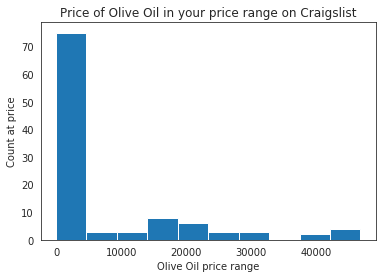

In [25]:
plt.hist(craigl_range.price, bins=10)
plt.xlabel('{} price range'.format(search_item))
plt.ylabel('Count at price')
plt.title('Price of {} in your price range on Craigslist'.format(search_item))

In [30]:
print ("While there is a wide range of prices on craigslist for {} the median price is ${}".format(search_item, craigl.price.median()))

While there is a wide range of prices on craigslist for Olive Oil the median price is $300.0


In [0]:
craigl_range.to_csv(r'C:\Users\sewmo\Desktop\Thinkful files\Data sets\craigslist{}.csv'.format(search_item), index = None, header=True)